#📌 Extracão

In [32]:
# Etapa de Extração: Carregando os dados da API
# Esta etapa utiliza a biblioteca requests para buscar dados de uma API e carrega seu conteúdo em um DataFrame pandas.
import pandas as pd
import requests
import json

# URL da API (substitua pelo URL real da API se for diferente)
api_url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/main/TelecomX_Data.json'

try:
    response = requests.get(api_url)
    response.raise_for_status() # Levanta um erro para códigos de status HTTP ruins (4xx ou 5xx)
    data = response.json()
    df = pd.DataFrame(data)
    print("Dados carregados com sucesso da API!")
    display(df.head())
except requests.exceptions.RequestException as e:
    print(f"Erro ao conectar ou buscar dados da API: {e}")
except json.JSONDecodeError:
    print(f"Erro ao decodificar a resposta JSON da API. Verifique se a resposta está no formato JSON válido.")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")

Dados carregados com sucesso da API!


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

In [33]:
# Etapa de Transformação: Verificando valores ausentes e achatando colunas aninhadas
# Aqui foi verificado se há valores nulos e foram expandidas as colunas que contêm dicionários aninhados em novas colunas.
print("Verificando valores ausentes:")
print(df.isnull().sum())

nested_cols = ['customer', 'phone', 'internet', 'account']
for col in nested_cols:
    df = pd.concat([df.drop(col, axis=1), df[col].apply(pd.Series)], axis=1)

df = pd.concat([df.drop('Charges', axis=1), df['Charges'].apply(pd.Series)], axis=1)

print("\nVerificando linhas duplicadas após achatar colunas aninhadas:")
print(df.duplicated().sum())

print("\nDataFrame após achatar colunas aninhadas:")
display(df.head())

Verificando valores ausentes:
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64

Verificando linhas duplicadas após achatar colunas aninhadas:
0

DataFrame após achatar colunas aninhadas:


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [34]:
# Etapa de Transformação: Renomeando coluna, convertendo tipo e tratando valores inconsistentes
# Aqui a coluna 'Total' foi renomeada para 'TotalCharges', converti para numérico e tratei valores ausentes. Também foram verificados os valores únicos em colunas categóricas.
df.rename(columns={'Total': 'TotalCharges'}, inplace=True)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

print("Valores ausentes em 'TotalCharges' após conversão:")
print(df['TotalCharges'].isnull().sum())

df['TotalCharges'] = df['TotalCharges'].fillna(0)

print("\nTipo de dado da coluna 'TotalCharges':")
print(df['TotalCharges'].dtype)

categorical_cols_to_check = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                             'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                             'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                             'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

print("\nVerificando valores únicos em colunas categóricas:")
for col in categorical_cols_to_check:
    if col in df.columns:
        print(f"\nColuna '{col}':")
        print(df[col].unique())
    else:
        print(f"\nColuna '{col}' não encontrada no DataFrame.")

Valores ausentes em 'TotalCharges' após conversão:
11

Tipo de dado da coluna 'TotalCharges':
float64

Verificando valores únicos em colunas categóricas:

Coluna 'gender':
['Female' 'Male']

Coluna 'SeniorCitizen':
[0 1]

Coluna 'Partner':
['Yes' 'No']

Coluna 'Dependents':
['Yes' 'No']

Coluna 'PhoneService':
['Yes' 'No']

Coluna 'MultipleLines':
['No' 'Yes' 'No phone service']

Coluna 'InternetService':
['DSL' 'Fiber optic' 'No']

Coluna 'OnlineSecurity':
['No' 'Yes' 'No internet service']

Coluna 'OnlineBackup':
['Yes' 'No' 'No internet service']

Coluna 'DeviceProtection':
['No' 'Yes' 'No internet service']

Coluna 'TechSupport':
['Yes' 'No' 'No internet service']

Coluna 'StreamingTV':
['Yes' 'No' 'No internet service']

Coluna 'StreamingMovies':
['No' 'Yes' 'No internet service']

Coluna 'Contract':
['One year' 'Month-to-month' 'Two year']

Coluna 'PaperlessBilling':
['Yes' 'No']

Coluna 'PaymentMethod':
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer

In [35]:
# Etapa de Transformação: Padronizando valores em colunas categóricas
# Nesta etapa, foram corrigidas inconsistências nos valores de algumas colunas categóricas para garantir uniformidade.
df['Churn'] = df['Churn'].replace('', 'No')

cols_to_replace_no_service = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                              'DeviceProtection', 'TechSupport', 'StreamingTV',
                              'StreamingMovies']

for col in cols_to_replace_no_service:
    if 'No internet service' in df[col].unique():
        df[col] = df[col].replace('No internet service', 'No')
    if 'No phone service' in df[col].unique():
         df[col] = df[col].replace('No phone service', 'No')

print("\nVerificando valores únicos em colunas categóricas após a limpeza:")
for col in categorical_cols_to_check:
    if col in df.columns:
        print(f"\nColuna '{col}':")
        print(df[col].unique())
    else:
        print(f"\nColuna '{col}' não encontrada no DataFrame.")


Verificando valores únicos em colunas categóricas após a limpeza:

Coluna 'gender':
['Female' 'Male']

Coluna 'SeniorCitizen':
[0 1]

Coluna 'Partner':
['Yes' 'No']

Coluna 'Dependents':
['Yes' 'No']

Coluna 'PhoneService':
['Yes' 'No']

Coluna 'MultipleLines':
['No' 'Yes']

Coluna 'InternetService':
['DSL' 'Fiber optic' 'No']

Coluna 'OnlineSecurity':
['No' 'Yes']

Coluna 'OnlineBackup':
['Yes' 'No']

Coluna 'DeviceProtection':
['No' 'Yes']

Coluna 'TechSupport':
['Yes' 'No']

Coluna 'StreamingTV':
['Yes' 'No']

Coluna 'StreamingMovies':
['No' 'Yes']

Coluna 'Contract':
['One year' 'Month-to-month' 'Two year']

Coluna 'PaperlessBilling':
['Yes' 'No']

Coluna 'PaymentMethod':
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']

Coluna 'Churn':
['No' 'Yes']


In [36]:
# Etapa de Transformação: Criando a coluna 'Contas_Diarias'
# Calcula uma nova coluna 'Contas_Diarias' dividindo os encargos mensais por 30.
df['Contas_Diarias'] = df['Monthly'] / 30

print("DataFrame com a nova coluna 'Contas_Diarias':")
display(df[['customerID', 'Monthly', 'Contas_Diarias']].head())

DataFrame com a nova coluna 'Contas_Diarias':


,customerID,Monthly,Contas_Diarias
0,0002-ORFBO,65.6,2.186667
1,0003-MKNFE,59.9,1.996667
2,0004-TLHLJ,73.9,2.463333
3,0011-IGKFF,98.0,3.266667
4,0013-EXCHZ,83.9,2.796667


#📊 Carga e análise

In [37]:
# Etapa de Análise: Realizando análise descritiva e contagem de valores
# Apresento as estatísticas descritivas para as colunas numéricas e a contagem de valores para as colunas categóricas.
print("Análise Descritiva do DataFrame:")
display(df.describe())

print("\nContagem de valores para colunas categóricas:")
for col in df.select_dtypes(include='object').columns:
    print(f"\nColuna '{col}':")
    print(df[col].value_counts())

Análise Descritiva do DataFrame:


,SeniorCitizen,tenure,Monthly,TotalCharges,Contas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098,2277.182035,2.157337
std,0.369074,24.571773,30.129572,2268.648587,1.004319
min,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,9.000000,35.425000,396.200000,1.180833
50%,0.000000,29.000000,70.300000,1389.200000,2.343333
75%,0.000000,55.000000,89.875000,3778.525000,2.995833
max,1.000000,72.000000,118.750000,8684.800000,3.958333



Contagem de valores para colunas categóricas:

Coluna 'customerID':
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7267, dtype: int64

Coluna 'Churn':
Churn
No     5398
Yes    1869
Name: count, dtype: int64

Coluna 'gender':
gender
Male      3675
Female    3592
Name: count, dtype: int64

Coluna 'Partner':
Partner
No     3749
Yes    3518
Name: count, dtype: int64

Coluna 'Dependents':
Dependents
No     5086
Yes    2181
Name: count, dtype: int64

Coluna 'PhoneService':
PhoneService
Yes    6560
No      707
Name: count, dtype: int64

Coluna 'MultipleLines':
MultipleLines
No     4202
Yes    3065
Name: count, dtype: int64

Coluna 'InternetService':
InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64

Coluna 'OnlineSecurity':
OnlineSecurity
No     5189
Yes    2078
Name: count, dtype: 

/tmp/ipython-input-2044602290.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='viridis')


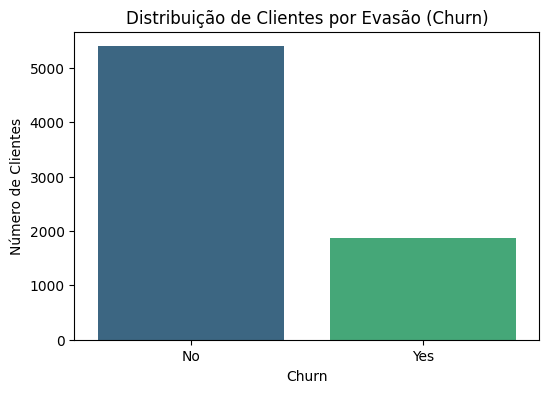

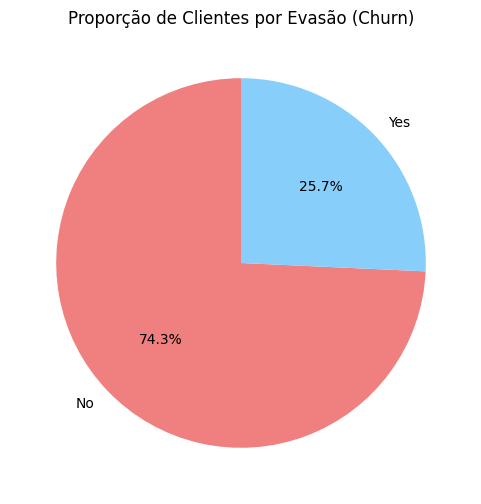

In [38]:
# Etapa de Análise: Visualizando a distribuição da variável 'Churn'
# Geramos gráficos (barras e pizza) para mostrar a distribuição geral de clientes que evadiram e não evadiram.
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Distribuição de Clientes por Evasão (Churn)')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.savefig('churn_distribution_bar.png') # Salva o gráfico de barras como PNG
plt.show()

# Gráfico de pizza
churn_counts = df['Churn'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'], startangle=90)
plt.title('Proporção de Clientes por Evasão (Churn)')
plt.savefig('churn_distribution_pie.png') # Salva o gráfico de pizza como PNG
plt.show()

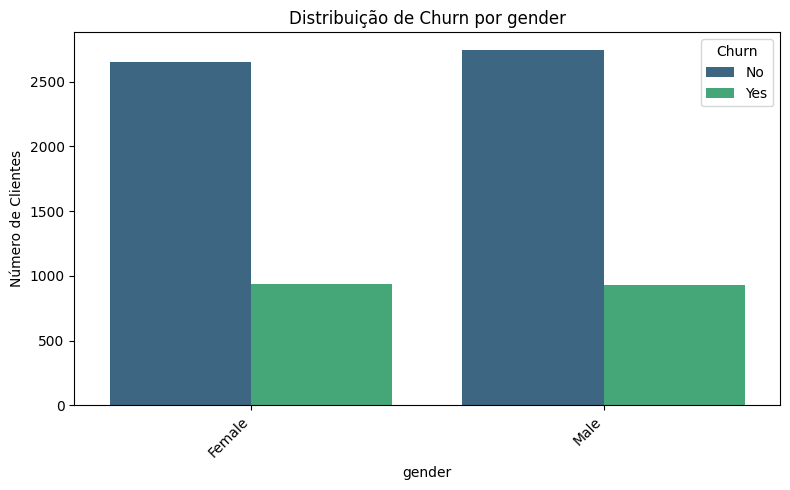

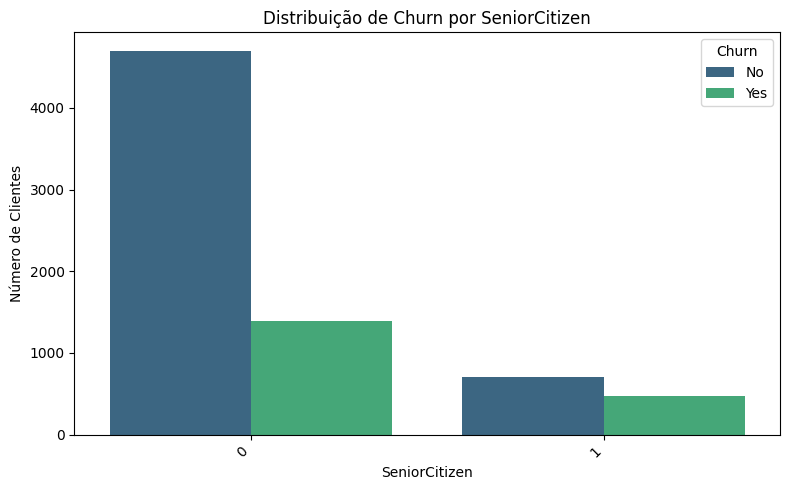

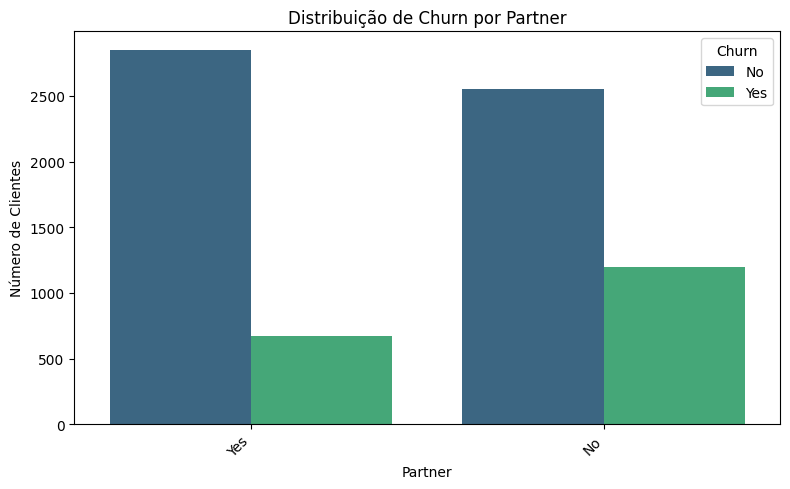

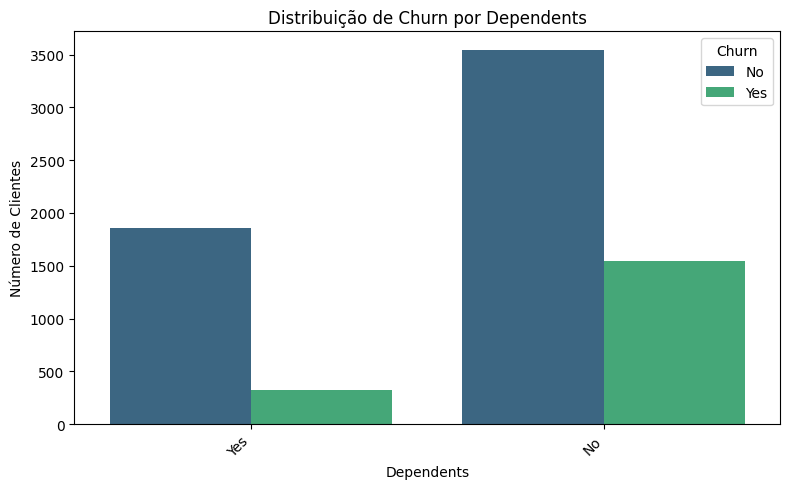

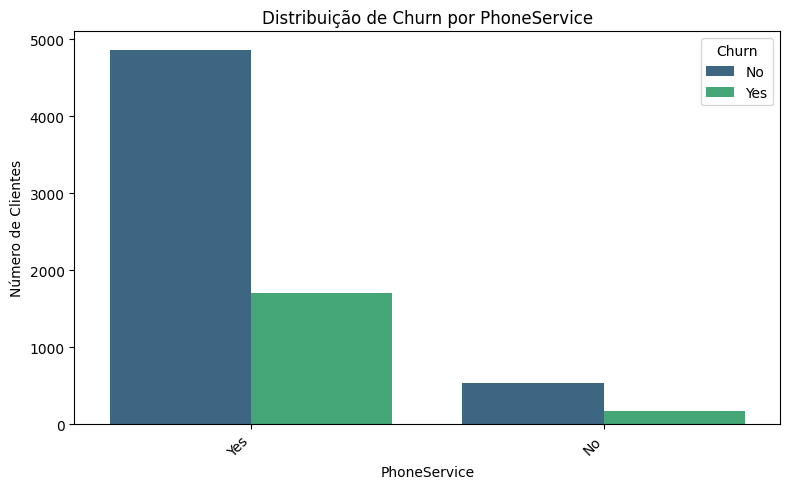

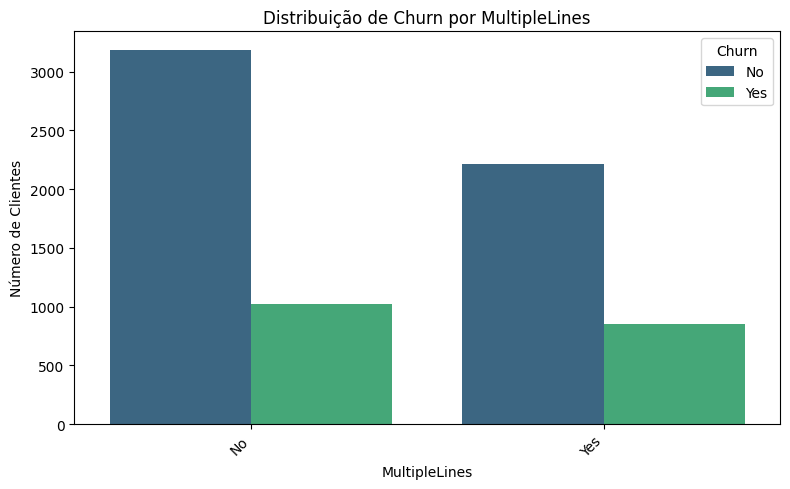

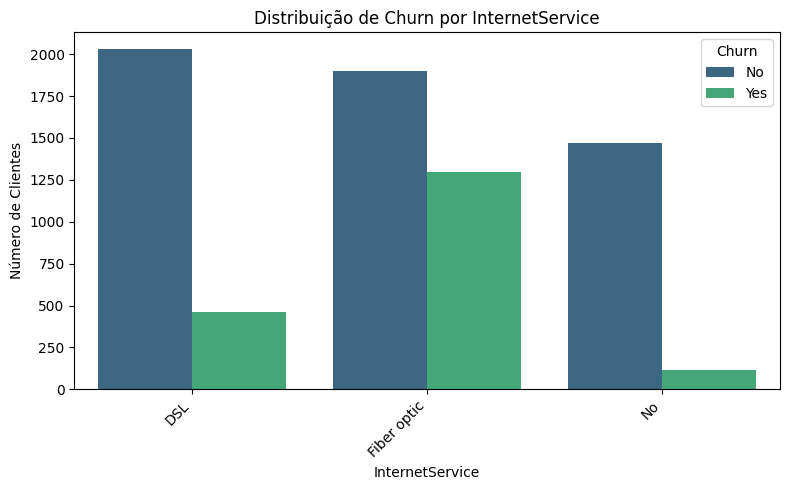

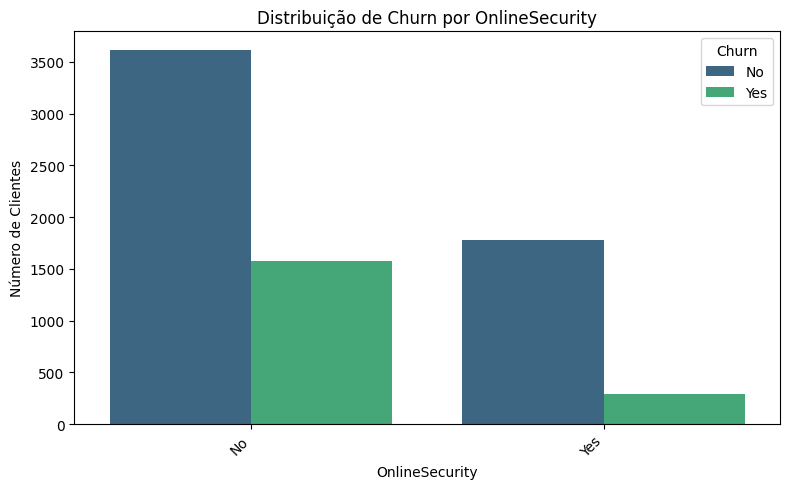

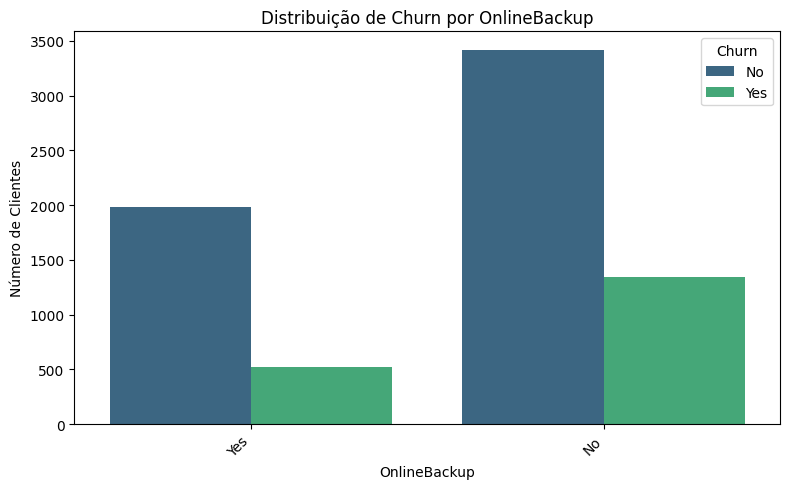

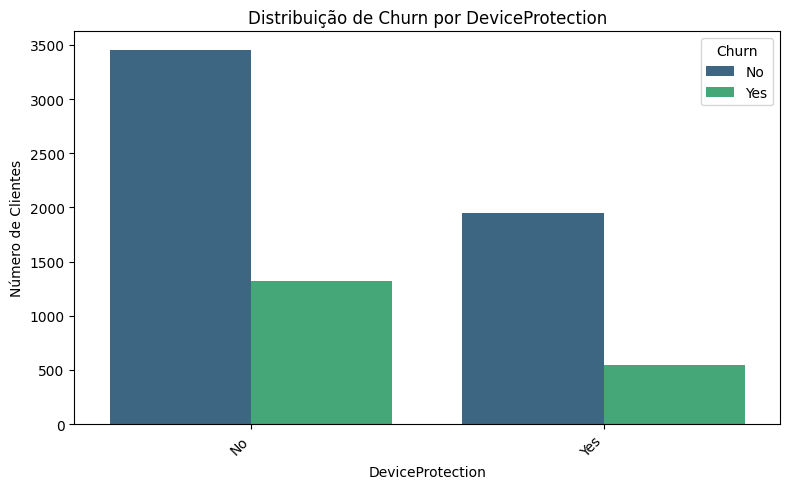

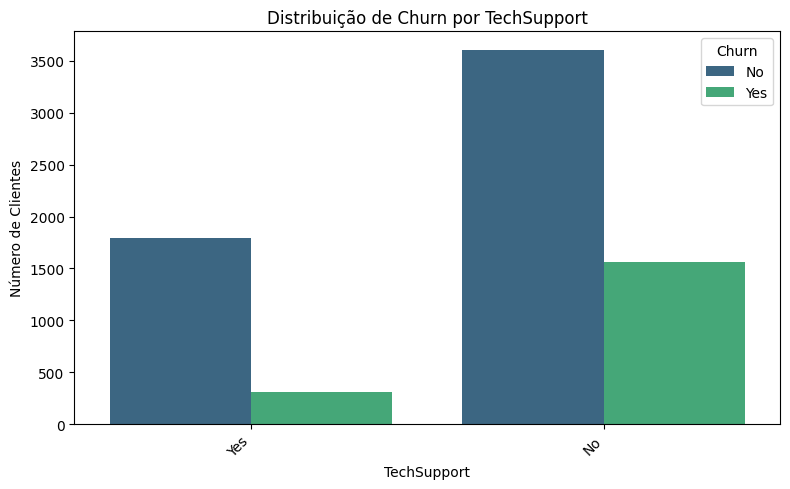

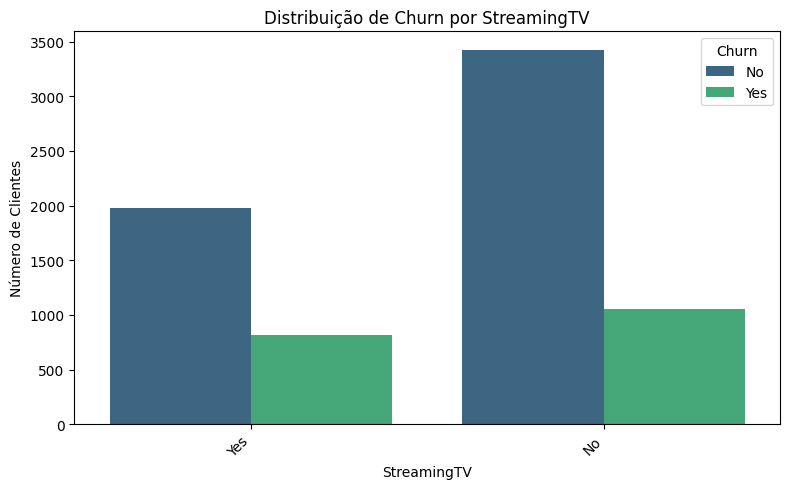

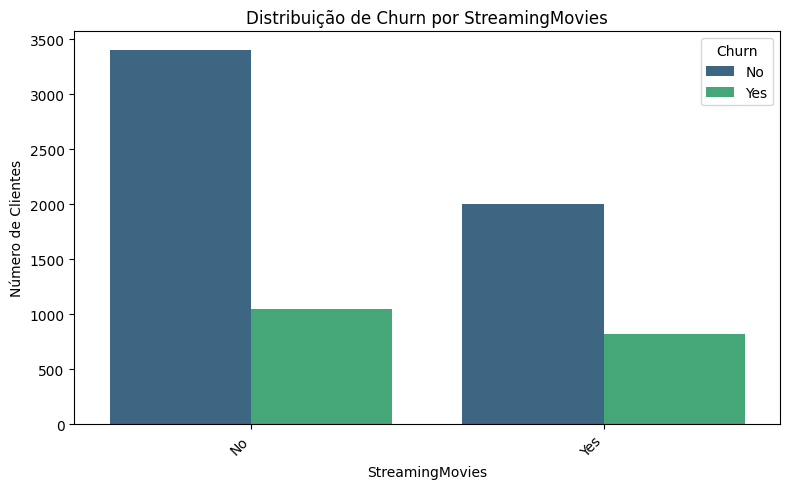

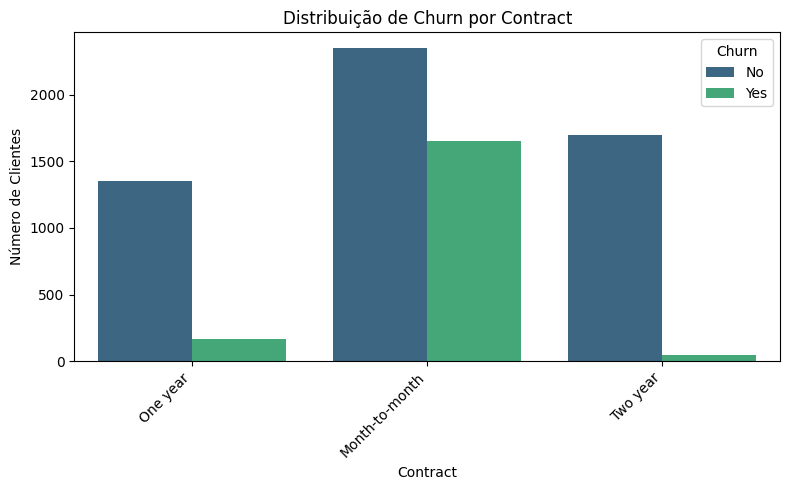

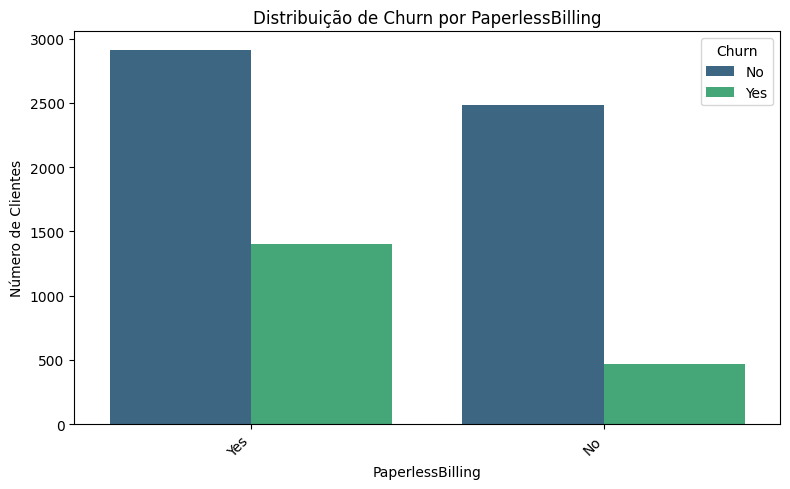

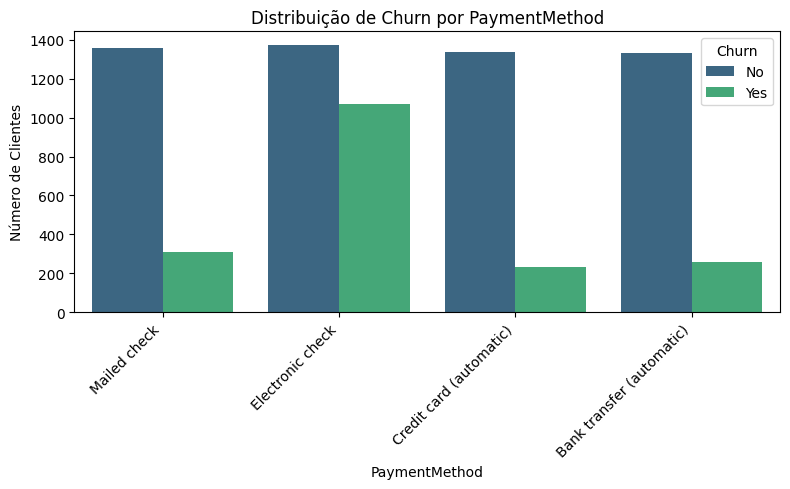

In [39]:
# Etapa de Análise: Visualizando a distribuição de Churn por variáveis categóricas
# Criamos gráficos de contagem para cada variável categórica, mostrando a relação entre a categoria e a evasão de clientes.
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='Churn', data=df, palette='viridis')
    plt.title(f'Distribuição de Churn por {col}')
    plt.xlabel(col)
    plt.ylabel('Número de Clientes')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f'churn_by_{col}.png') # Salva o gráfico como PNG
    plt.show()

/tmp/ipython-input-2040727933.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='viridis')


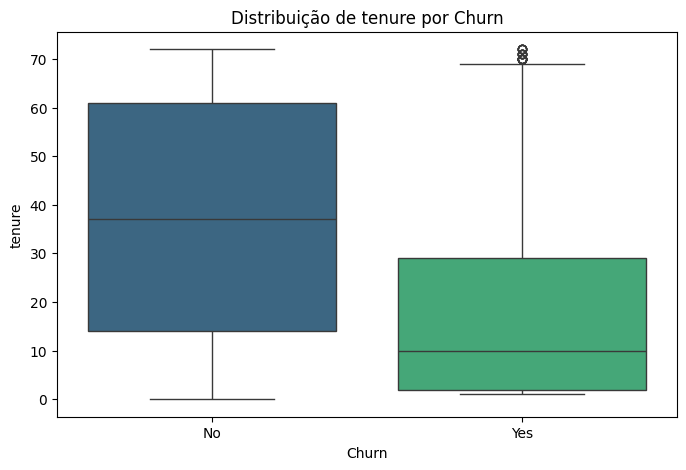

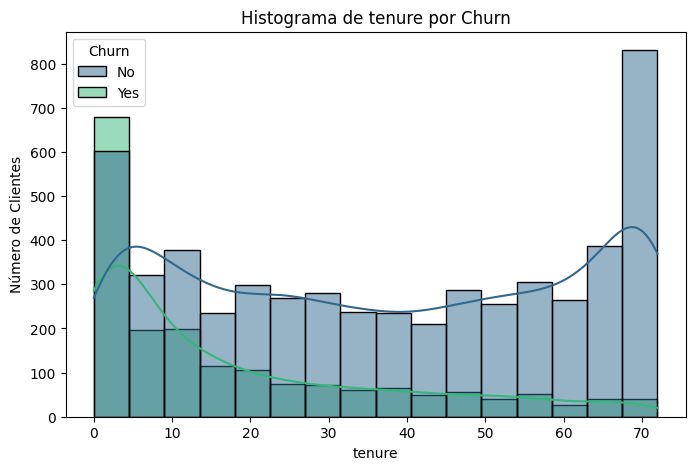

/tmp/ipython-input-2040727933.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='viridis')


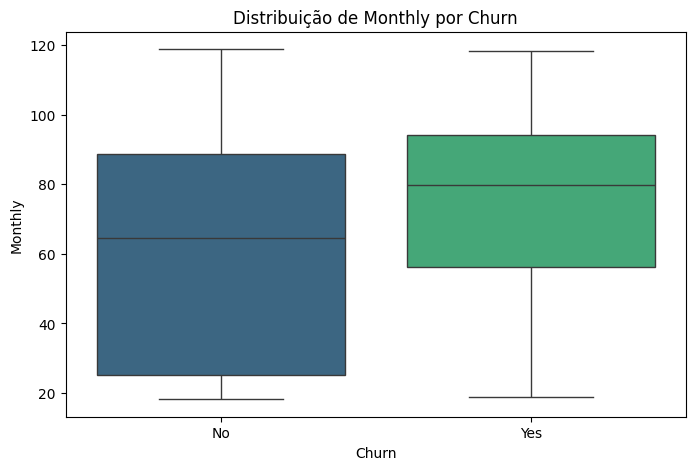

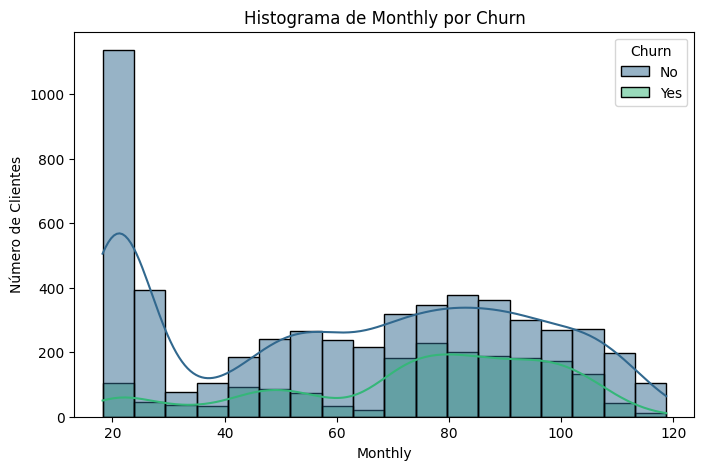

/tmp/ipython-input-2040727933.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='viridis')


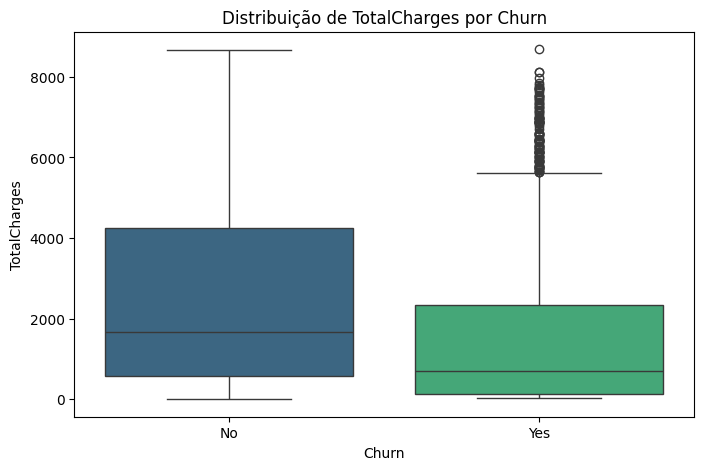

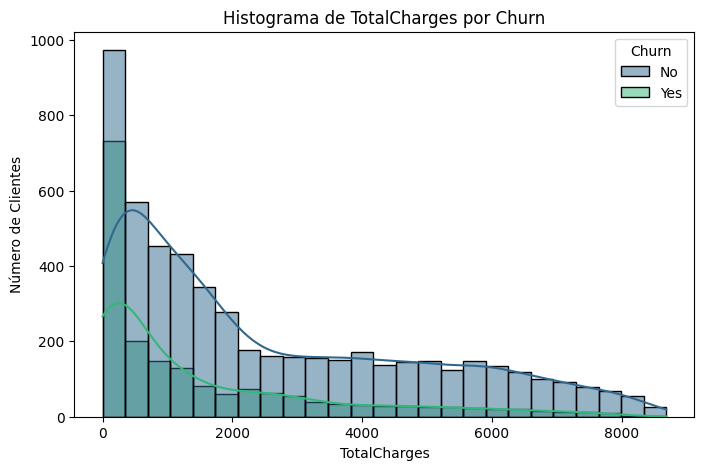

/tmp/ipython-input-2040727933.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='viridis')


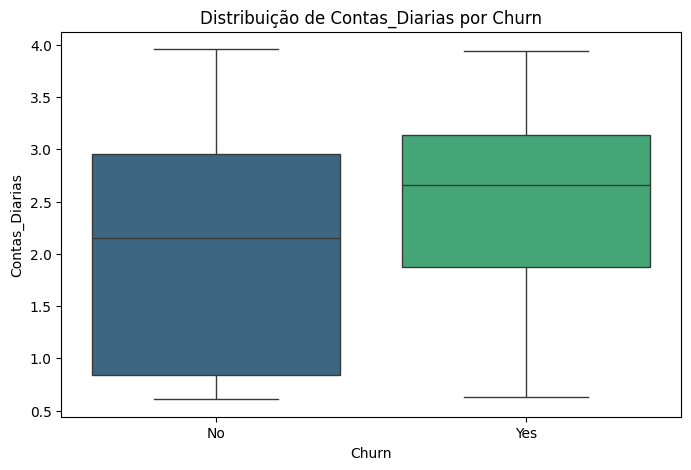

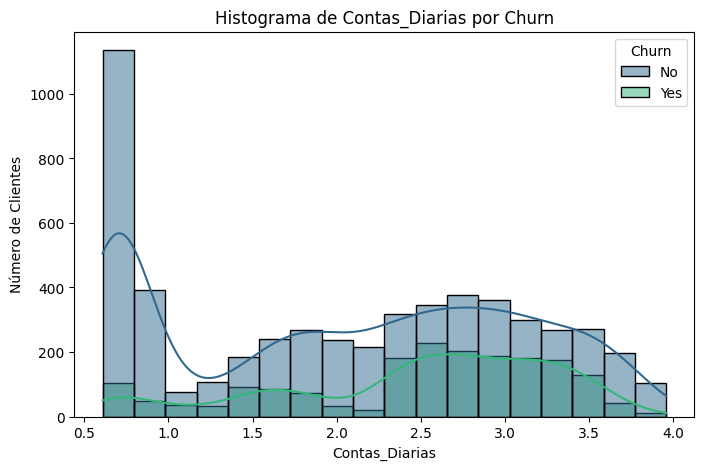

In [40]:
# Etapa de Análise: Visualizando a distribuição de variáveis numéricas por Churn
# Geramos box plots e histogramas para analisar como a distribuição de variáveis numéricas varia entre clientes que evadiram e não evadiram.
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['tenure', 'Monthly', 'TotalCharges', 'Contas_Diarias']

for col in numerical_cols:
    # Box plot
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Churn', y=col, data=df, palette='viridis')
    plt.title(f'Distribuição de {col} por Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.savefig(f'{col}_distribution_boxplot.png') # Salva o box plot como PNG
    plt.show()

    # Histograma
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, hue='Churn', kde=True, palette='viridis')
    plt.title(f'Histograma de {col} por Churn')
    plt.xlabel(col)
    plt.ylabel('Número de Clientes')
    plt.savefig(f'{col}_distribution_histogram.png') # Salva o histograma como PNG
    plt.show()

#📄Relatorio Final

Distribuição de Clientes por Evasão (Churn)


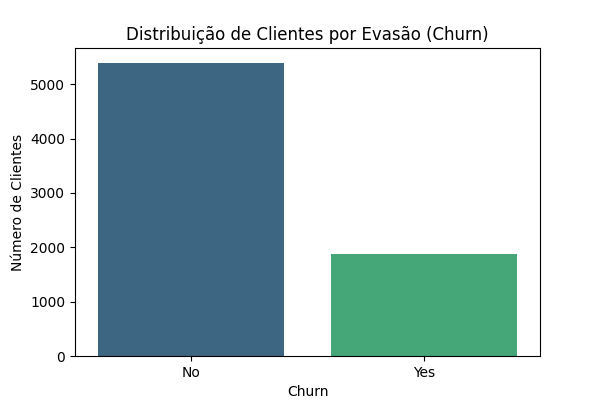


Proporção de Clientes por Evasão (Churn)


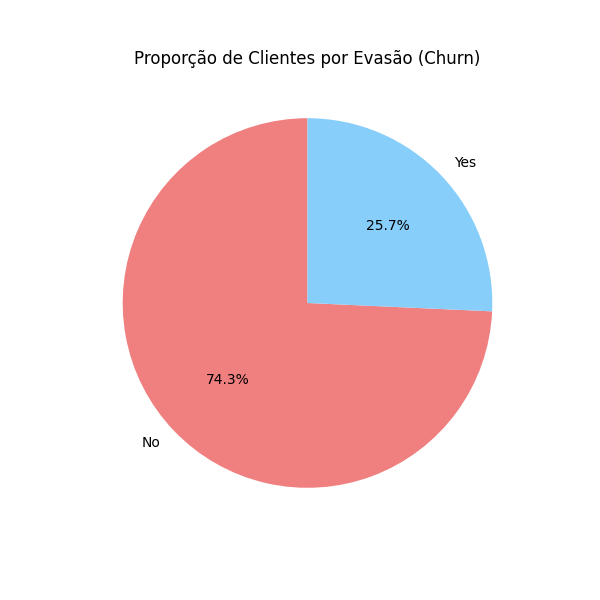

In [41]:
from IPython.display import Image, display

# Display images for the Churn Distribution section
print("Distribuição de Clientes por Evasão (Churn)")
display(Image('churn_distribution_bar.png'))

print("\nProporção de Clientes por Evasão (Churn)")
display(Image('churn_distribution_pie.png'))

Análise por Variáveis Categóricas:

Distribuição de Churn por gender


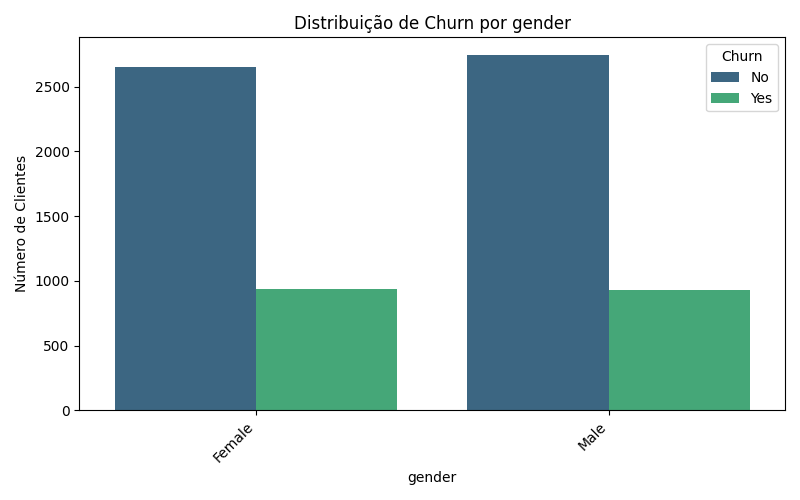


Distribuição de Churn por SeniorCitizen


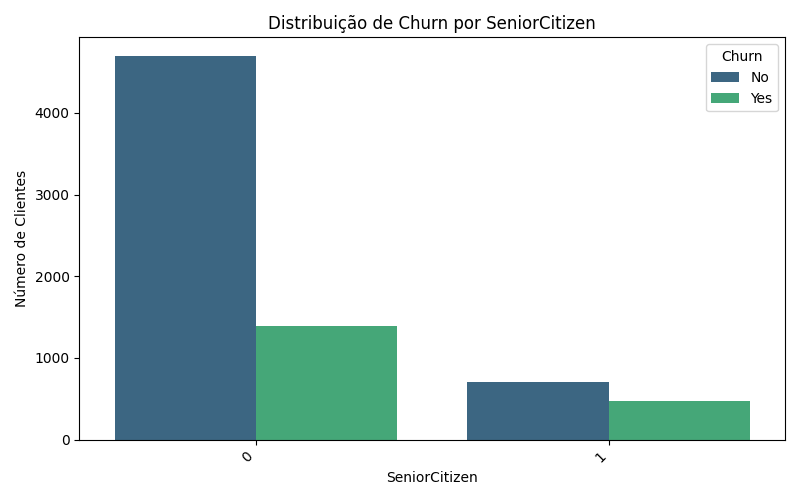


Distribuição de Churn por Partner


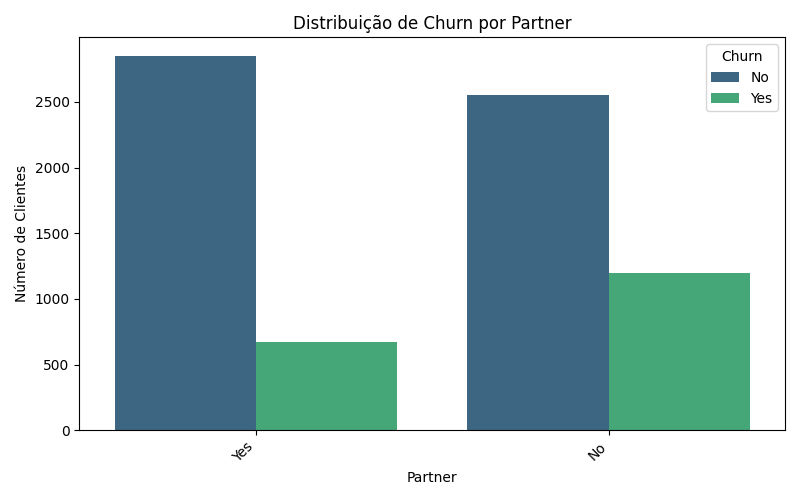


Distribuição de Churn por Dependents


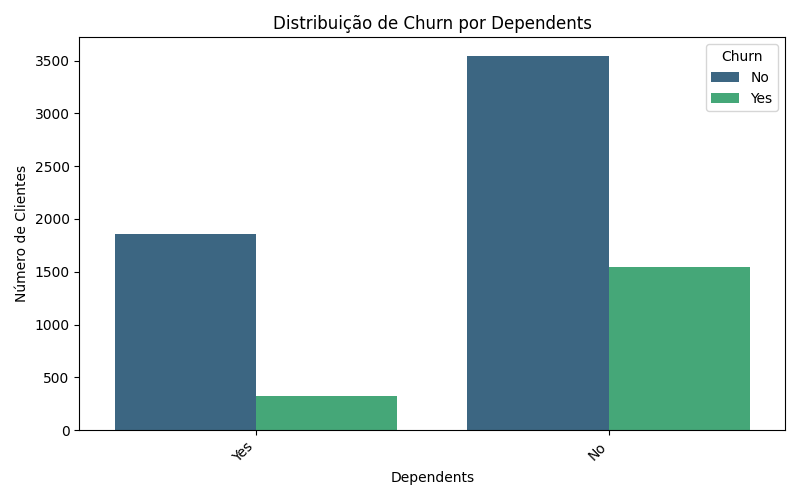


Distribuição de Churn por PhoneService


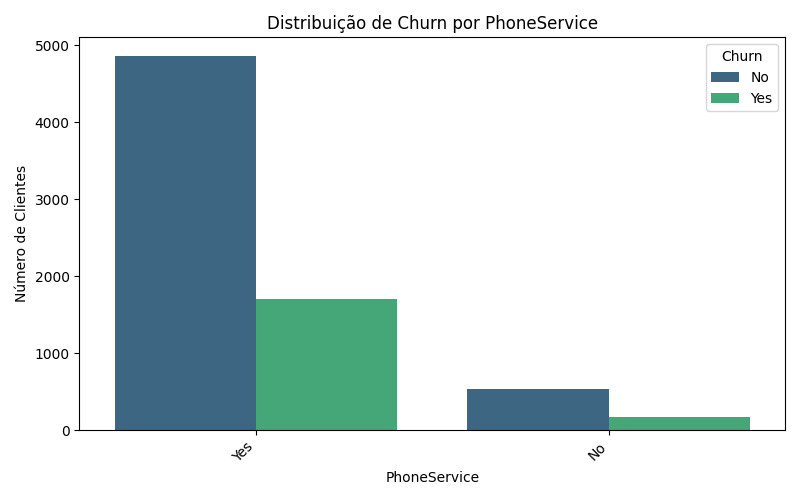


Distribuição de Churn por MultipleLines


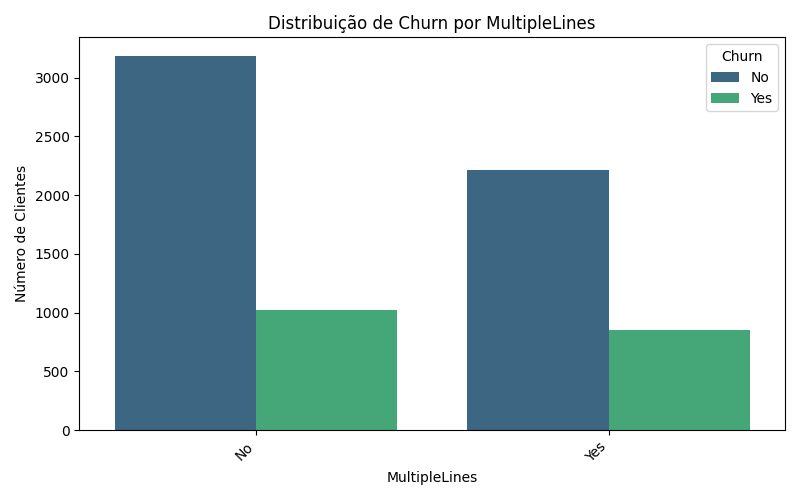


Distribuição de Churn por InternetService


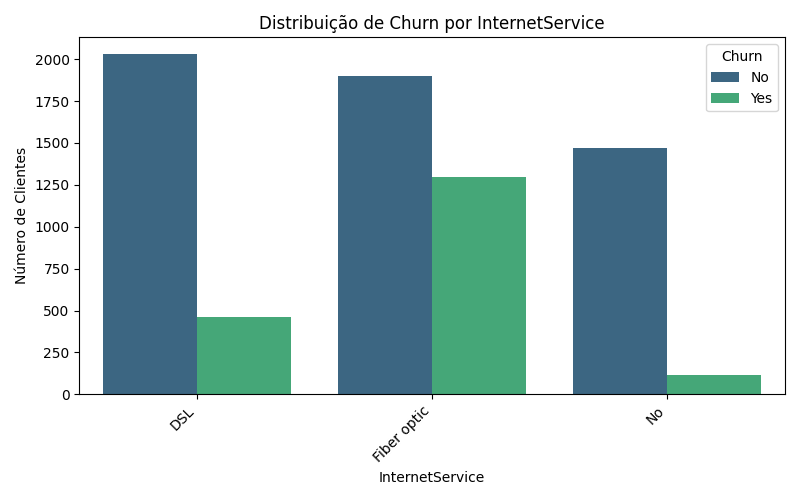


Distribuição de Churn por OnlineSecurity


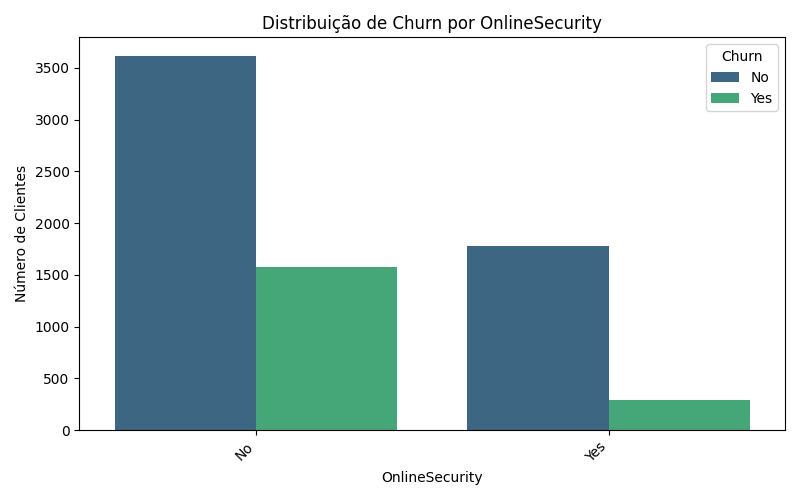


Distribuição de Churn por OnlineBackup


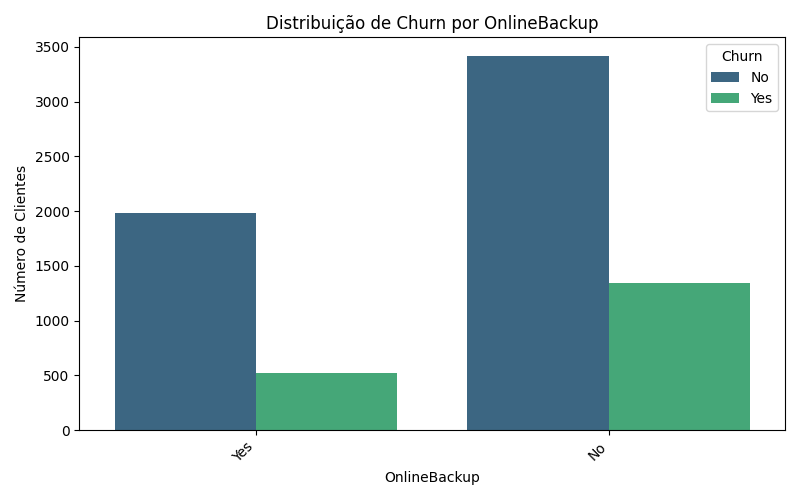


Distribuição de Churn por DeviceProtection


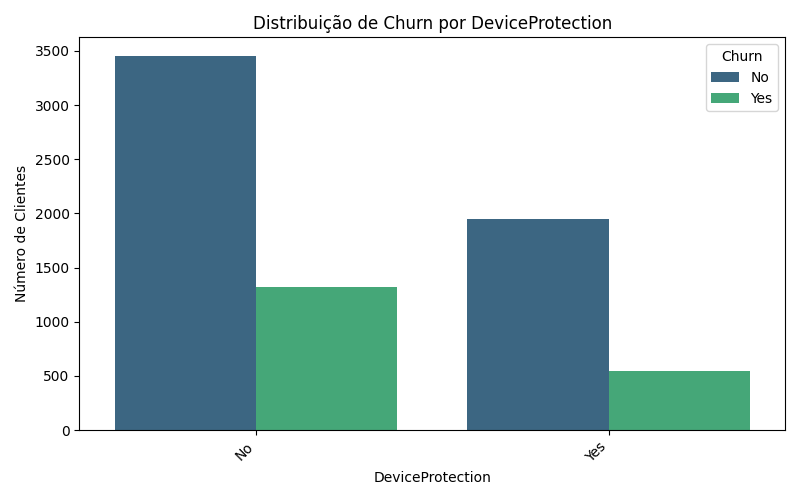


Distribuição de Churn por TechSupport


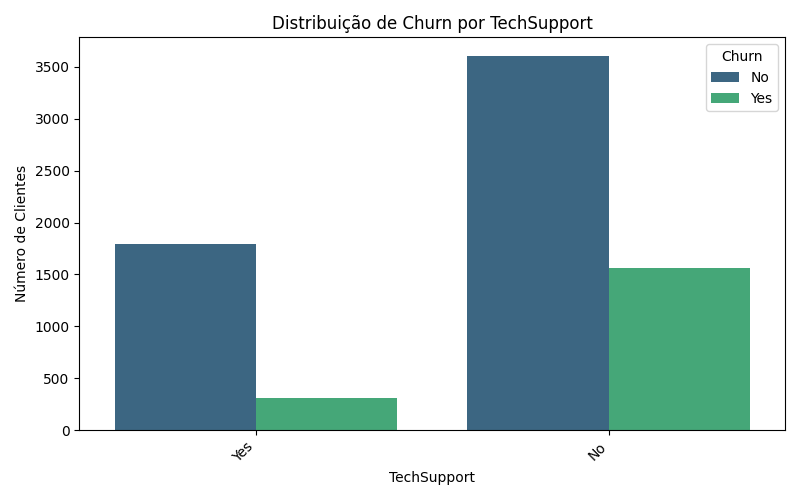


Distribuição de Churn por StreamingTV


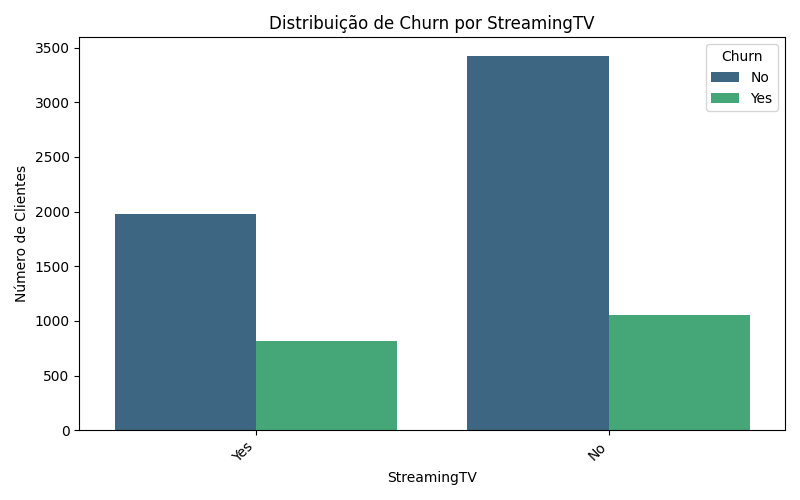


Distribuição de Churn por StreamingMovies


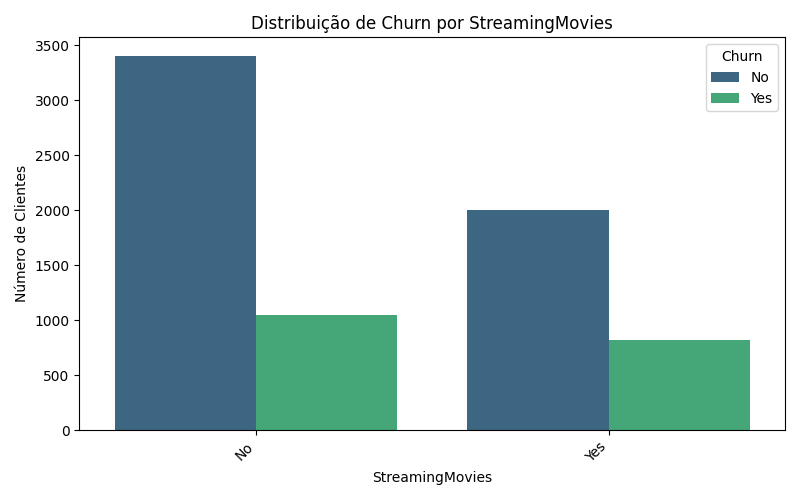


Distribuição de Churn por Contract


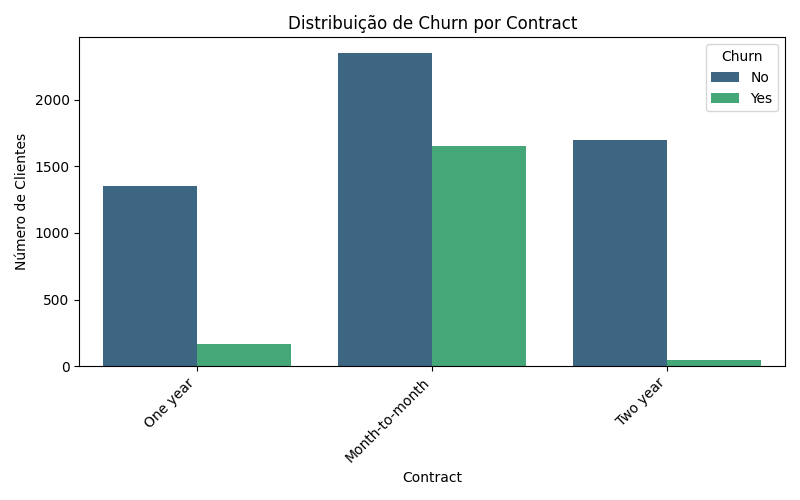


Distribuição de Churn por PaperlessBilling


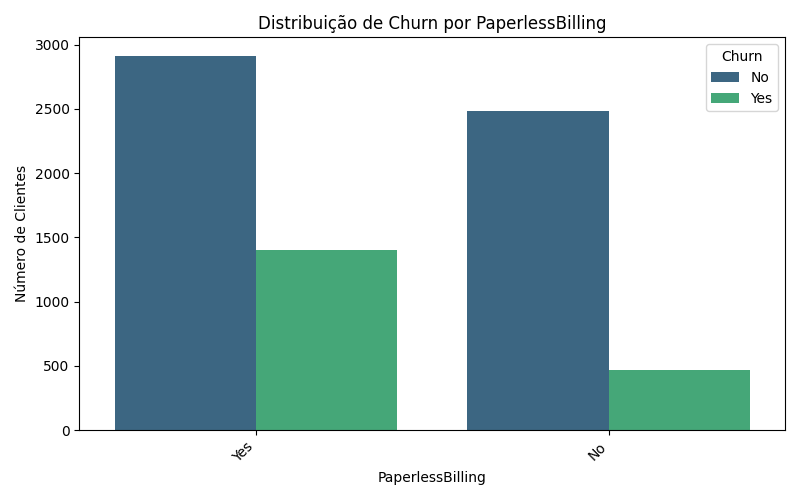


Distribuição de Churn por PaymentMethod


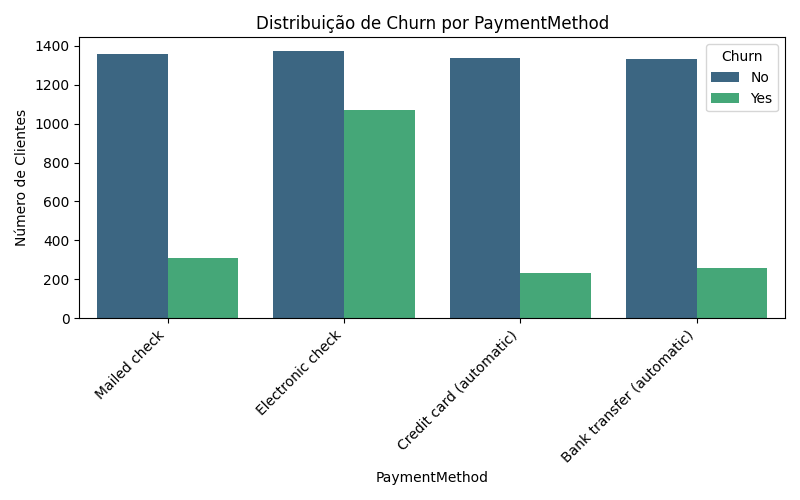

In [42]:
from IPython.display import Image, display

# Display images for the Categorical Variables section
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

print("Análise por Variáveis Categóricas:")
for col in categorical_cols:
    print(f"\nDistribuição de Churn por {col}")
    display(Image(f'churn_by_{col}.png'))

Análise por Variáveis Numéricas:

Distribuição de tenure por Churn (Box Plot)


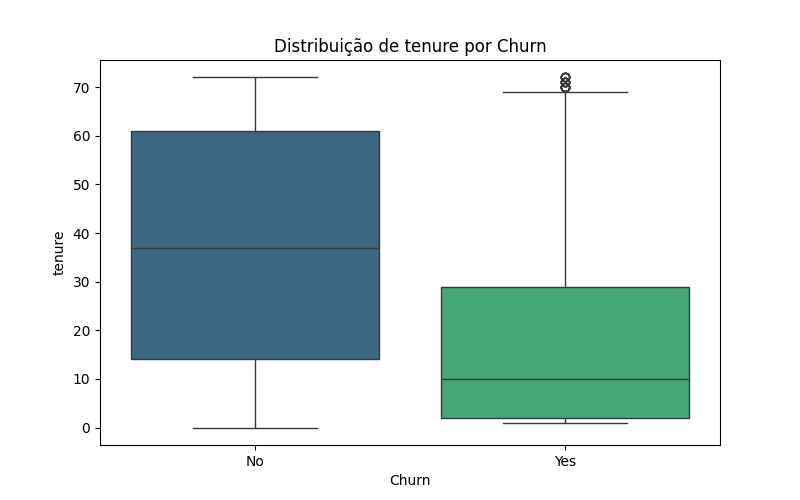


Histograma de tenure por Churn


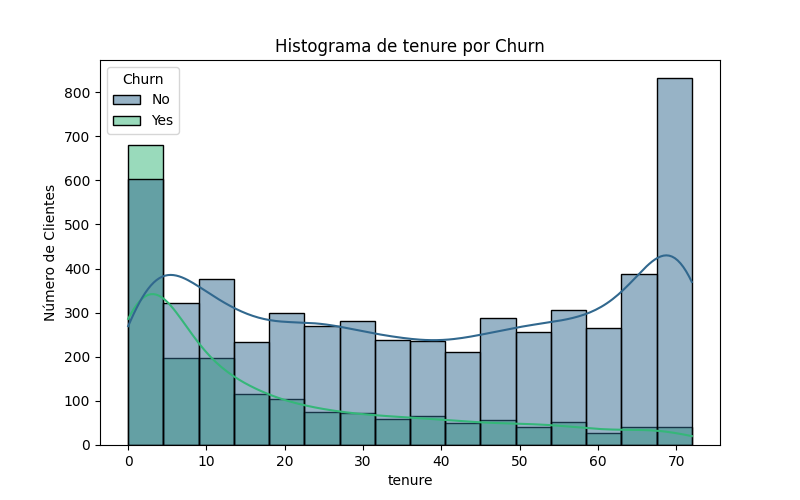


Distribuição de Monthly por Churn (Box Plot)


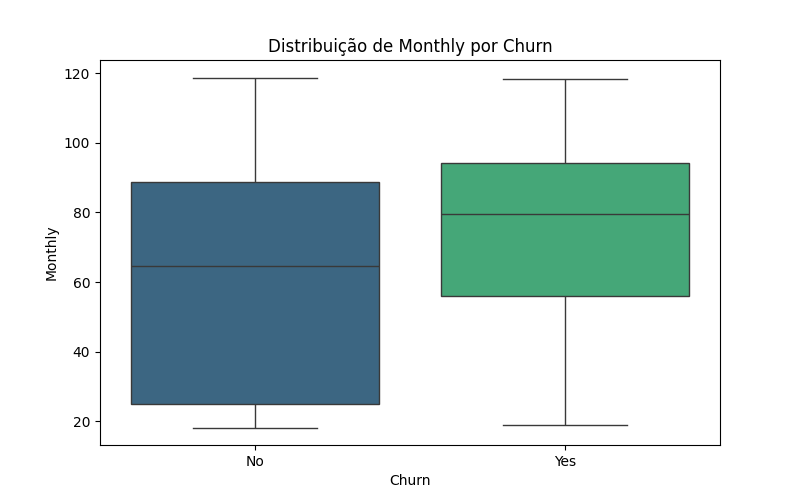


Histograma de Monthly por Churn


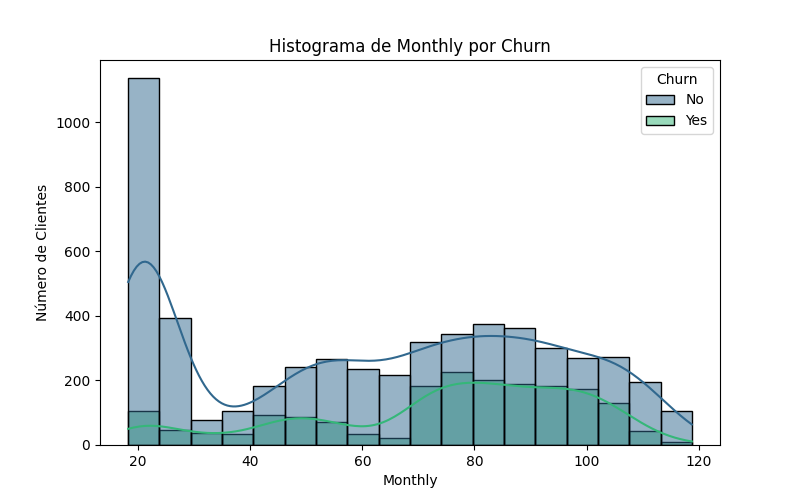


Distribuição de TotalCharges por Churn (Box Plot)


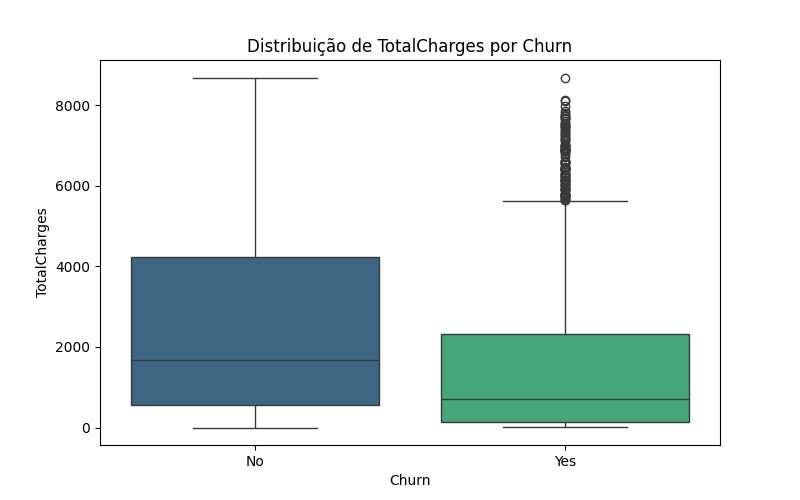


Histograma de TotalCharges por Churn


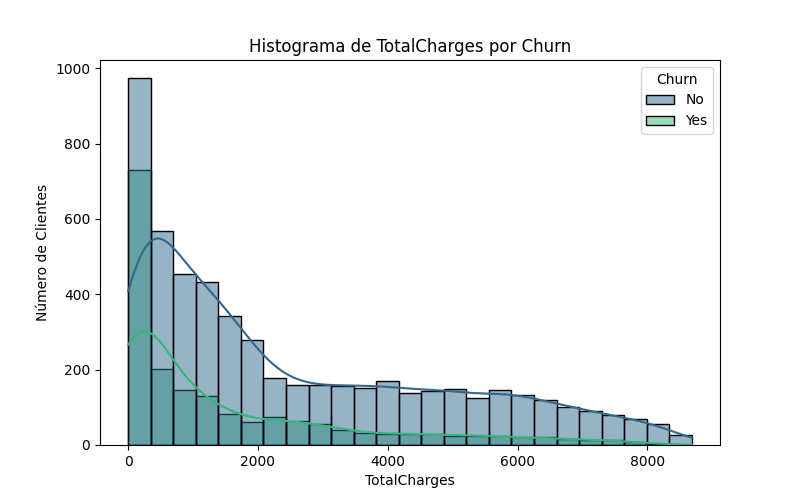


Distribuição de Contas_Diarias por Churn (Box Plot)


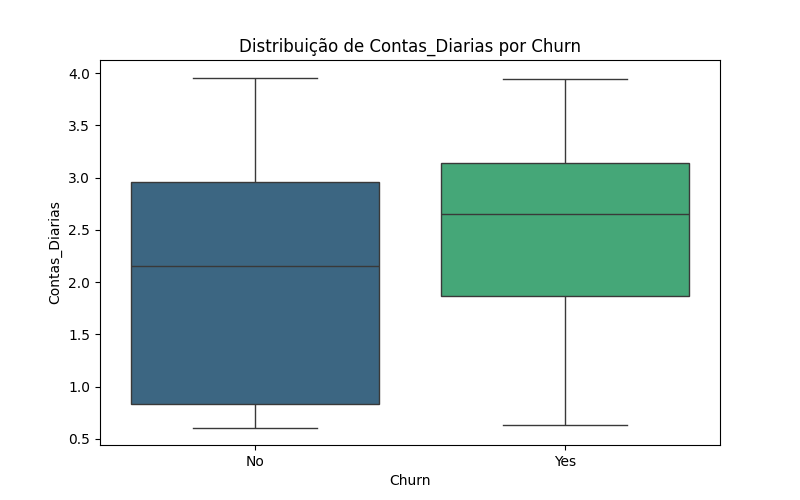


Histograma de Contas_Diarias por Churn


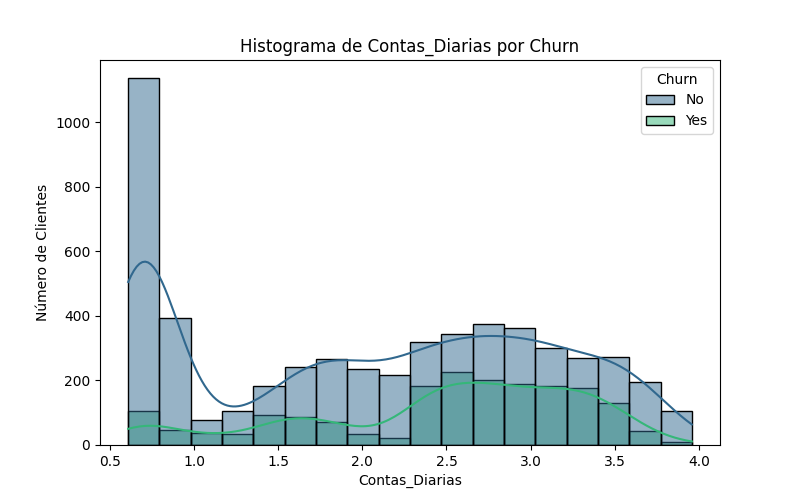

In [43]:
from IPython.display import Image, display

# Display images for the Numerical Variables section
numerical_cols = ['tenure', 'Monthly', 'TotalCharges', 'Contas_Diarias']

print("Análise por Variáveis Numéricas:")
for col in numerical_cols:
    print(f"\nDistribuição de {col} por Churn (Box Plot)")
    display(Image(f'{col}_distribution_boxplot.png'))

    print(f"\nHistograma de {col} por Churn")
    display(Image(f'{col}_distribution_histogram.png'))

## Relatório Final: Análise de Evasão de Clientes (Churn)

### Introdução

O objetivo principal desta análise foi investigar e compreender os principais fatores que contribuem para a evasão de clientes (Churn) na TelecomX. O Churn representa um desafio crítico para empresas de telecomunicações, impactando diretamente a base de clientes, a receita e a sustentabilidade do negócio. Ao identificar os padrões de comportamento e as características dos clientes que decidem cancelar seus serviços, a TelecomX pode desenvolver estratégias de retenção mais eficazes e personalizadas, focando em reter clientes valiosos e reduzir perdas financeiras.

### Etapa de Extração, Limpeza e Tratamento de Dados

O processo de análise iniciou com a crucial etapa de **extração** dos dados brutos. Obtive os dados a partir do arquivo `TelecomX_Data.json`, que continha as informações sobre os clientes da TelecomX. Esta extração foi o ponto de partida, garantindo que eu tivesse o conjunto de dados necessário para realizar toda a análise subsequente.

Após a extração bem-sucedida, procedi à **limpeza e tratamento dos dados**. Esta fase é fundamental em qualquer projeto de análise, pois dados brutos frequentemente contêm inconsistências, formatos inadequados ou valores ausentes que podem distorcer os resultados da análise. As seguintes ações foram executadas de forma sistemática utilizando a poderosa e flexível biblioteca pandas:

-   **Carregamento dos Dados:** Os dados foram lidos e carregados diretamente do arquivo JSON para um DataFrame pandas (`df`) utilizando a função `pd.read_json()`. Escolhi esta função por ser a maneira mais direta e eficiente de importar dados no formato JSON para a estrutura tabular do pandas, que é ideal para manipulação e análise de dados.

-   **Verificação Inicial de Valores Ausentes:** Realizei uma inspeção inicial completa para identificar a presença de valores nulos (ausentes) em todas as colunas do DataFrame utilizando `df.isnull().sum()`. Esta verificação é vital para entender a completude do dataset e planejar as estratégias de tratamento de valores ausentes. Felizmente, nesta fase inicial, não foram encontrados valores ausentes nas colunas principais de interesse para a análise, o que simplificou as etapas subsequentes de limpeza.

-   **Achatar Colunas Aninhadas:** Observei atentamente a estrutura do DataFrame e identifiquei que algumas colunas ('customer', 'phone', 'internet', 'account', 'Charges') continham dados aninhados na forma de dicionários Python. Para tornar esses dados acessíveis e utilizáveis em uma análise tabular plana, foi necessário "achatar" ou expandir cada uma dessas colunas aninhadas em múltiplas colunas individuais, onde cada chave do dicionário se tornaria uma nova coluna no DataFrame principal. Realizei esta expansão iterando sobre a lista de colunas aninhadas e aplicando a função `pd.Series` a cada elemento dessas colunas. A função `pd.Series` converte cada dicionário em uma nova série pandas, que foi então facilmente concatenada de volta ao DataFrame original (`pd.concat`), substituindo as colunas aninhadas pelas novas colunas expandidas.

-   **Tratamento da Coluna 'TotalCharges':** A coluna que representava o total de encargos pagos pelo cliente, inicialmente chamada 'Total' após a expansão dos dados aninhados, foi renomeada para 'TotalCharges' utilizando `df.rename(columns={'Total': 'TotalCharges'}, inplace=True)` para melhorar a clareza e a legibilidade do código e do relatório. Identifiquei que esta coluna, apesar de representar valores monetários, não estava no formato numérico adequado (dtype 'object'), provavelmente devido à presença de strings vazias ou outros caracteres não numéricos. Para permitir cálculos e análises estatísticas nesta coluna, converti-a explicitamente para o tipo numérico utilizando `pd.to_numeric(df['TotalCharges'], errors='coerce')`. O argumento `errors='coerce'` foi essencial aqui, pois ele trata de forma graciosa quaisquer valores que não puderam ser transformados em número, convertendo-os para `NaN` (Not a Number) em vez de gerar um erro. Após a conversão, verifiquei a quantidade de valores `NaN` resultantes (`df['TotalCharges'].isnull().sum()`) e optei por preenchê-los com 0 utilizando `df['TotalCharges'].fillna(0)`. Esta decisão foi tomada considerando que valores ausentes em encargos totais podem corresponder a clientes muito recentes que ainda não acumularam encargos significativos, e preencher com 0 é uma abordagem comum e razoável neste cenário.

-   **Consistência de Valores Categóricos:** Durante a fase de exploração inicial (verificando os valores únicos nas colunas), identifiquei algumas inconsistências nos valores presentes em colunas categóricas importantes para a análise de Churn. Especificamente, a coluna 'Churn' continha valores vazios ('') além das categorias esperadas 'Yes' e 'No'. Para garantir a integridade e a precisão da variável alvo, substituí todos os valores vazios na coluna 'Churn' por 'No' utilizando `df['Churn'].replace('', 'No')`, assumindo que um registro com Churn vazio indica que o cliente não evadiu. Além disso, colunas relacionadas a serviços adicionais como 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV' e 'StreamingMovies' apresentavam valores como 'No phone service' ou 'No internet service' quando o cliente não possuía o respectivo serviço principal (telefone ou internet). Para simplificar e padronizar as categorias nessas colunas e facilitar análises futuras, substituí esses termos mais longos por simplesmente 'No' utilizando `df[col].replace()`. Essas padronizações são cruciais para evitar erros em análises futuras, especialmente em processos de codificação para modelagem preditiva.

### Etapa de Análise Exploratória de Dados

A **análise exploratória de dados (AED)** foi aprofundada para visualizar as distribuições das variáveis e entender a relação entre elas e a variável alvo, Churn. Esta etapa é vital para descobrir padrões, identificar relacionamentos e formar hipóteses sobre os fatores que influenciam a evasão de clientes antes de construir modelos preditivos. Para esta análise visual, utilizei as bibliotecas `matplotlib.pyplot` e `seaborn`, que oferecem uma ampla gama de ferramentas para a criação de visualizações estatísticas informativas e esteticamente agradáveis:

-   **Distribuição de Churn:** Para obter uma compreensão clara da distribuição da variável alvo, Churn, gerei dois tipos de gráficos: um gráfico de barras (`sns.countplot`) e um gráfico de pizza (`plt.pie`). O gráfico de barras mostrou a contagem absoluta de clientes em cada categoria de Churn ('Yes' para evasão, 'No' para não evasão), permitindo ver o desbalanceamento entre as classes. O gráfico de pizza complementou essa visão, apresentando a proporção percentual de clientes em cada categoria de Churn. Esta análise inicial confirmou que a base de clientes é majoritariamente de não evadidos, mas com uma parcela significativa (aproximadamente 25.7%) de clientes que evadiram, reforçando a necessidade de investigar os fatores por trás desse comportamento para reduzir essa taxa.

**Distribuição de Clientes por Evasão (Churn)**

![Distribuição de Clientes por Evasão (Churn)](churn_distribution_bar.png)

**Proporção de Clientes por Evasão (Churn)**

![Proporção de Clientes por Evasão (Churn)](churn_distribution_pie.png)

-   **Análise por Variáveis Categóricas:** Para investigar como cada variável categórica se relaciona com a probabilidade de Churn, criei gráficos de contagem (`sns.countplot`) para cada uma delas. Em cada gráfico, utilizei a variável categórica no eixo X e a contagem de clientes no eixo Y, com a variável 'Churn' definida como o parâmetro `hue`. Isso dividiu as barras em cada categoria pela cor, representando a distribuição de clientes com e sem Churn dentro dessa categoria. Esta abordagem visual permitiu identificar rapidamente quais categorias dentro de cada variável tinham uma proporção maior de clientes que evadiram. Os insights chave desta análise incluíram:
    -   Clientes com o tipo de contrato 'Month-to-month' exibiram uma taxa de Churn notavelmente mais alta em comparação com clientes com contratos de 'One year' ou 'Two year'. Isso é um indicativo forte de que a falta de um compromisso de longo prazo torna os clientes mais propensos a cancelar.
    -   A ausência de serviços adicionais como OnlineSecurity, TechSupport, OnlineBackup, DeviceProtection, StreamingTV e StreamingMovies foi consistentemente associada a uma maior propensão ao Churn. Clientes que utilizam esses serviços parecem estar mais "presos" ao ecossistema da TelecomX e percebem maior valor, tornando-os menos propensos a evadir.
    -   O método de pagamento 'Electronic check' destacou-se por apresentar uma taxa de Churn consideravelmente superior aos outros métodos (Mailed check, Bank transfer, Credit card). Isso sugere que pode haver atrito no processo de pagamento eletrônico ou que este método é preferido por clientes que já estão insatisfeitos ou planejando cancelar.
    -   Clientes que não possuíam parceiros ou dependentes em seus planos mostraram uma tendência maior a evadir. Isso pode indicar que a decisão de Churn é mais individualizada e menos influenciada por responsabilidades familiares ou a necessidade de manter múltiplos usuários conectados.

**Distribuição de Churn por Gênero**

![Distribuição de Churn por Gênero](churn_by_gender.png)

**Distribuição de Churn por SeniorCitizen**

![Distribuição de Churn por SeniorCitizen](churn_by_SeniorCitizen.png)

**Distribuição de Churn por Parceiro**

![Distribuição de Churn por Parceiro](churn_by_Partner.png)

**Distribuição de Churn por Dependentes**

![Distribuição de Churn por Dependentes](churn_by_Dependents.png)

**Distribuição de Churn por Serviço de Telefone**

![Distribuição de Churn por Serviço de Telefone](churn_by_PhoneService.png)

**Distribuição de Churn por Múltiplas Linhas**

![Distribuição de Churn por Múltiplas Linhas](churn_by_MultipleLines.png)

**Distribuição de Churn por Serviço de Internet**

![Distribuição de Churn por Serviço de Internet](churn_by_InternetService.png)

**Distribuição de Churn por Segurança Online**

![Distribuição de Churn por Segurança Online](churn_by_OnlineSecurity.png)

**Distribuição de Churn por Backup Online**

![Distribuição de Churn por Backup Online](churn_by_OnlineBackup.png)

**Distribuição de Churn por Proteção de Dispositivo**

![Distribuição de Churn por Proteção de Dispositivo](churn_by_DeviceProtection.png)

**Distribuição de Churn por Suporte Técnico**

![Distribuição de Churn por Suporte Técnico](churn_by_TechSupport.png)

**Distribuição de Churn por Streaming de TV**

![Distribuição de Churn por Streaming de TV](churn_by_StreamingTV.png)

**Distribuição de Churn por Streaming de Filmes**

![Distribuição de Churn por Streaming de Filmes](churn_by_StreamingMovies.png)

**Distribuição de Churn por Contrato**

![Distribuição de Churn por Contrato](churn_by_Contract.png)

**Distribuição de Churn por Faturamento Sem Papel**

![Distribuição de Churn por Faturamento Sem Papel](churn_by_PaperlessBilling.png)

**Distribuição de Churn por Método de Pagamento**

![Distribuição de Churn por Método de Pagamento](churn_by_PaymentMethod.png)

-   **Análise por Variáveis Numéricas:** Para as colunas numéricas mais relevantes para entender o comportamento do cliente ('tenure', 'Monthly', 'TotalCharges', e a nova feature 'Contas_Diarias'), utilizei box plots (`sns.boxplot`) e histogramas (`sns.histplot`) para visualizar suas distribuições em relação à variável Churn. Os box plots foram escolhidos por serem excelentes para comparar a dispersão, a mediana e a presença de outliers em uma variável numérica entre diferentes grupos (Churn 'Yes' vs 'No'). Os histogramas, por sua vez, permitiram visualizar a frequência de valores dentro de intervalos para cada grupo de Churn, revelando a forma da distribuição. Os principais achados desta análise foram:
    -   Clientes que evadiram ('Yes') apresentaram consistentemente um 'tenure' (tempo de contrato com a empresa) significativamente menor do que aqueles que não evadiram ('No'). A distribuição de 'tenure' para clientes com Churn é fortemente inclinada para valores menores, indicando que a maioria das evasões ocorre nos primeiros meses de serviço. Isso sugere que a experiência inicial do cliente é um fator crítico na retenção.
    -   Clientes com Churn ('Yes') tenderam a ter valores médios e medianos mais altos para 'Monthly' (encargos mensais) e 'TotalCharges' (encargos totais) em comparação com clientes sem Churn ('No'). Isso pode indicar que clientes que pagam mais por seus serviços são mais sensíveis ao preço ou percebem menos valor em relação ao custo, levando-os a buscar alternativas. A variável 'Contas_Diarias', derivada de 'Monthly', exibiu um padrão similar, reforçando a correlação entre custos mais altos e Churn.

**Distribuição de Tenure por Churn (Box Plot)**

![Distribuição de Tenure por Churn (Box Plot)](tenure_distribution_boxplot.png)

**Histograma de Tenure por Churn**

![Histograma de Tenure por Churn](tenure_distribution_histogram.png)

**Distribuição de Monthly por Churn (Box Plot)**

![Distribuição de Monthly por Churn (Box Plot)](Monthly_distribution_boxplot.png)

**Histograma de Monthly por Churn**

![Histograma de Monthly por Churn](Monthly_distribution_histogram.png)

**Distribuição de TotalCharges por Churn (Box Plot)**

![Distribuição de TotalCharges por Churn (Box Plot)](TotalCharges_distribution_boxplot.png)

**Histograma de TotalCharges por Churn**

![Histograma de TotalCharges por Churn](TotalCharges_distribution_histogram.png)

**Distribuição de Contas Diárias por Churn (Box Plot)**

![Distribuição de Contas Diárias por Churn (Box Plot)](Contas_Diarias_distribution_boxplot.png)

**Histograma de Contas Diárias por Churn**

![Histograma de Contas Diárias por Churn](Contas_Diarias_distribution_histogram.png)

### Conclusões e Insights

A análise exploratória de dados realizada forneceu insights valiosos e acionáveis, permitindo identificar claramente alguns dos principais impulsionadores do Churn na TelecomX:

-   **Tipo de Contrato:** O tipo de contrato é um dos preditores mais fortes de Churn. Clientes com contratos de curto prazo (Month-to-month) representam um grupo de alto risco significativo, demandando atenção especial em termos de estratégias de retenção.
-   **Serviços Adicionais:** A adesão a serviços de segurança online e suporte técnico está fortemente associada a uma menor probabilidade de Churn. Isso indica que estes serviços não são apenas fontes de receita adicional, mas também agregam valor percebido pelo cliente e contribuem para a sua fidelização e satisfação.
-   **Método de Pagamento:** O método de pagamento eletrônico é um indicador de maior risco de Churn. É crucial investigar as razões subjacentes a essa correlação para mitigar o risco.
-   **Tempo de Contrato (Tenure):** Clientes nos primeiros meses de contrato são significativamente mais propensos a evadir. O período inicial da jornada do cliente é um ponto crítico onde a experiência do cliente deve ser otimizada para garantir a retenção a longo prazo.
-   **Encargos:** Clientes com encargos mensais e totais mais altos tendem a ter uma maior taxa de Churn. Isso sugere que a percepção de valor versus custo é um fator importante na decisão de Churn.

### Recomendações

Com base nos insights robustos obtidos a partir da análise de dados, as seguintes recomendações estratégicas podem ser implementadas pela TelecomX para reduzir efetivamente a evasão de clientes e aumentar a retenção:

-   **Incentivar Contratos de Longo Prazo:**
    -   Desenvolver e promover ativamente ofertas com descontos progressivos e benefícios exclusivos para clientes que optam por contratos de 12 ou 24 meses. A economia a longo prazo e a estabilidade de preço devem ser claramente comunicadas.
    -   Criar pacotes de serviços premium ou incluir benefícios adicionais sem custo extra (como um período de teste de um serviço premium) para clientes que assinam contratos mais longos, aumentando o valor percebido e criando um "bloqueio" positivo contra o Churn.
    -   Treinar a equipe de vendas e atendimento para destacar proativamente as vantagens dos contratos de longo prazo durante as interações com os clientes.

-   **Promover Serviços Adicionais como Fator Chave de Retenção:**
    -   Lançar campanhas de marketing segmentadas, focadas em clientes sem serviços de segurança online e suporte técnico, destacando os riscos de não tê-los e os benefícios de segurança, tranquilidade e conveniência que eles oferecem.
    -   Oferecer períodos de teste gratuitos estendidos ou demonstrações interativas e personalizadas para serviços premium como OnlineSecurity e TechSupport, permitindo que os clientes experimentem o valor antes de se comprometerem.
    -   Integrar a oferta e explicação dos benefícios dos serviços adicionais no fluxo de onboarding e nas interações regulares de atendimento ao cliente.

-   **Analisar e Otimizar a Experiência de Pagamento Eletrônico:**
    -   Realizar uma auditoria completa do processo de pagamento eletrônico para identificar quaisquer pontos de atrito, falhas técnicas, falta de clareza nas informações ou dificuldades de uso que possam estar contribuindo para a insatisfação e o Churn.
    -   Considerar oferecer incentivos tangíveis (ex: pequenos descontos na fatura, pontos de fidelidade) para clientes de alto risco de Churn que optarem por migrar para métodos de pagamento automático (cartão de crédito recorrente, débito em conta), que historicamente apresentam menor taxa de evasão.
    -   Garantir que as notificações sobre faturas, datas de vencimento e pagamentos sejam claras, oportunas e enviadas através dos canais de comunicação preferidos pelo cliente.

-   **Implementar Programas Robustos e Proativos de Retenção para Novos Clientes:**
    -   Desenvolver um programa de "boas-vindas" estruturado e personalizado que inclua comunicação proativa (e-mails, SMS, ligações de acompanhamento) nos primeiros 3 a 6 meses após a ativação do serviço.
    -   Designar pontos de contato dedicados ou oferecer canais de suporte técnico prioritário para novos clientes durante o período inicial para garantir que quaisquer dúvidas ou problemas sejam resolvidos de forma rápida e eficiente, criando uma experiência positiva desde o início.
    -   Realizar pesquisas de satisfação e check-ins proativos nos primeiros meses para identificar e abordar quaisquer preocupações ou insatisfações precocemente, antes que elas se transformem em motivos para Churn.

-   **Revisar a Estrutura de Preços e Oferecer Flexibilidade:**
    -   Realizar uma análise detalhada da relação entre os encargos mensais/totais e a taxa de Churn em diferentes segmentos de clientes. Determinar se os pacotes de serviços com custos mais elevados estão entregando um valor percebido equivalente que justifique o preço para o cliente.
    -   Considerar a introdução de opções de pacotes mais flexíveis, modulares ou personalizáveis que permitam aos clientes escolher apenas os serviços de que precisam, potencialmente reduzindo o custo percebido e aumentando a satisfação.
    -   Desenvolver ofertas de retenção personalizadas para clientes de alto valor que demonstram risco de Churn devido a encargos elevados, como a possibilidade de renegociação de contrato, descontos temporários ou a inclusão de um serviço adicional sem custo extra.

-   **Utilizar Segmentação de Clientes e Modelos Preditivos para Ações Proativas de Retenção:**
    -   Construir e implementar modelos preditivos de Churn (este pode ser um excelente próximo passo) utilizando os insights e variáveis identificadas nesta análise para classificar clientes individuais com base em sua probabilidade de evadir em tempo real.
    -   Criar campanhas de retenção altamente direcionadas e personalizadas para os segmentos de clientes identificados como de alto risco, oferecendo benefícios específicos, suporte proativo ou opções de renegociação de contrato antes que o cliente tome a decisão de cancelar.
    -   Capacitar as equipes de linha de frente (atendimento ao cliente, vendas, suporte técnico) com informações sobre o risco de Churn dos clientes com quem estão interagindo e dar-lhes autonomia e ferramentas para oferecer soluções de retenção no momento da interação, transformando um possível ponto de Churn em uma oportunidade de fidelização.